In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import tqdm
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [13]:
class SigmoidNeuron():
    def __init__(self):
        self.w = None
        self.b = None
    def perceptron(self, x):
        return -(np.dot(x, self.w.T) + self.b)
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(x))
    def grad_w_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    def grad_b_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    def grad_w_ce(self, x, y):
        y_pred = self.sigmoud(self.perceptron(x))
        return (y_pred - y) * x
    def grad_b_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y)
    def predict(self, X):
        Y = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y.append(y_pred)
        return np.array(Y)
    def fit(self, X, Y, epochs = 1, lr = 1, loss_fn = "mse", initialise = True, display_loss = False):
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
        if display_loss:
            loss = {}
        for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
            dw = 0
            db = 0
            for x, y in zip(X,Y):
                if(loss_fn == "ce"):
                    dw += self.grad_w_ce(x, y)
                    db += self.grad_b_ce(x, y)
                elif(loss_fn == "mse"):
                    dw += self.grad_w_mse(x, y)
                    db += self.grad_b_mse(x, y)
            m = X.shape[1]
            self.w -= lr * dw/m
            self.b -= lr * db/m
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                if(loss_fn == "mse"):
                    loss[i] = mean_squared_error(Y, Y_pred)
                elif(loss_fn == "ce"):
                    loss[i] = log_loss(Y, Y_pred)
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            if(loss_fn == "mse"):
                plt.ylabel("Mean Squared Error")
            elif(loss_fn == "ce"):
                plt.ylabel("Cross Entropy Error")
            plt.show()       

In [2]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "blue"])

# **Generate Data**

In [3]:
data, labels = make_blobs(n_samples = 1000, centers = 4, n_features = 2, random_state = 0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


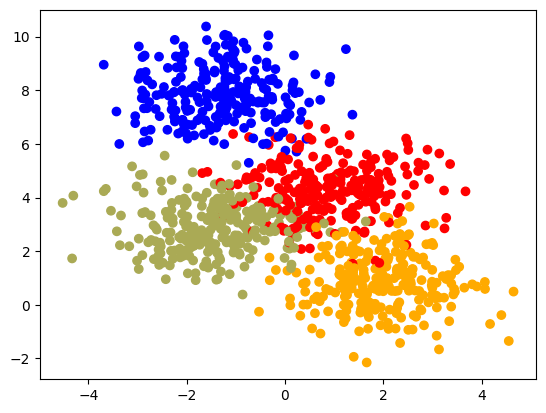

In [4]:
plt.scatter(data[:,0], data[:,1],c = labels, cmap = cmap)
plt.show()

In [5]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

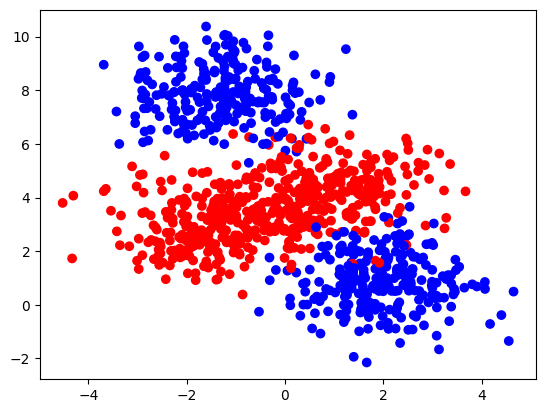

In [6]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap = cmap)
plt.show()

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify = labels, random_state = 0)

In [8]:
print(X_train.shape, X_test.shape)

(750, 2) (250, 2)


# **SN Classification**

C:\Users\Admin\AppData\Local\Temp\ipykernel_13148\2432410426.py:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

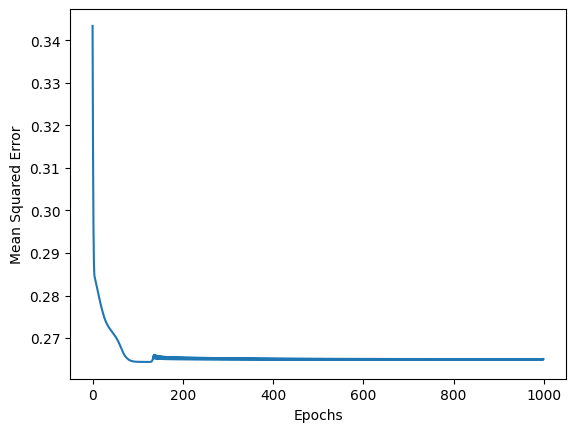

In [14]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs = 1000, lr = 0.5, initialise = True, display_loss = True)

In [15]:
Y_pred_train = sn.predict(X_train)
Y_binerised_train = (Y_pred_train > 0.5).astype("int").ravel()
Y_pred_test = sn.predict(X_test)
Y_binerised_test = (Y_pred_test > 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_binerised_train, Y_train)
accuracy_test = accuracy_score(Y_binerised_test, Y_test)

In [16]:
print("Train accuracy", accuracy_train)
print("Test accuracy", accuracy_test)

Train accuracy 0.732
Test accuracy 0.712


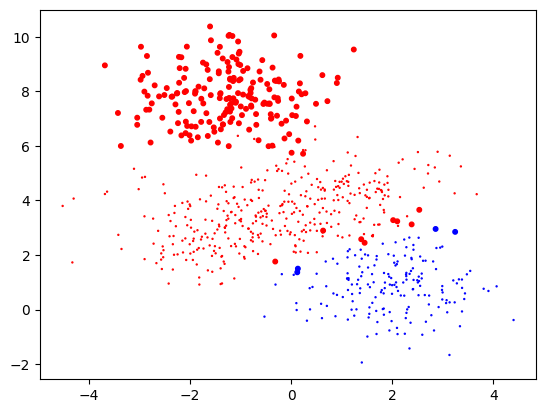

In [17]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_binerised_train, cmap = cmap, s = 10*np.abs(Y_binerised_train - Y_train)+.5)
plt.show()

# **Simple FF Network**

In [18]:
class FFNetwork:
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
    def sigmoid(self,x):
        return 1.0 /(1.0 + np.exp(-x))
    def forward_pass(self, x):
        self.x1 , self.x2 = x                                         #          h3
        self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1     #          a3
        self.h1 = self.sigmoid(self.a1)                               #      h2        h1
        self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2     #      a2        a1
        self.h2 = self.sigmoid(self.a2)                               #      x1        x2
        self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3
    def grad(self, x, y):
        self.forward_pass(x)
        self.dw6 = (self.h3 - y)*(self.h3)*(1 - self.h3)*(self.h2)
        self.dw5 = (self.h3 - y)*(self.h3)*(1 - self.h3)*(self.h1)
        self.db3 = (self.h3 - y)*(self.h3)*(1 - self.h3)
        self.dw1 = (self.h3 - y)*(self.h3)*(1 - self.h3)*(self.w5)*(self.h1)*(1 - self.h1)*(self.x1)
        self.dw2 = (self.h3 - y)*(self.h3)*(1 - self.h3)*(self.w5)*(self.h1)*(1 - self.h1)*(self.x2)
        self.db1 = (self.h3 - y)*(self.h3)*(1 - self.h3)*(self.w5)*(self.h1)*(1 - self.h1)
        self.dw3 = (self.h3 - y)*(self.h3)*(1 - self.h3)*(self.w6)*(self.h2)*(1 - self.h2)*(self.x1)
        self.dw4 = (self.h3 - y)*(self.h3)*(1 - self.h3)*(self.w6)*(self.h2)*(1 - self.h2)*(self.x2)
        self.db2 = (self.h3 - y)*(self.h3)*(1 - self.h3)*(self.w6)*(self.h2)*(1 - self.h2)
    def predict(self, X):
        Y = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y.append(y_pred)
        return np.array(Y)
    def fit(self, X, Y, epochs = 1, lr = 1, initialise = True, display_loss = False):
        if initialise:
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0
        if display_loss:
            loss = {}
        for i in tqdm.notebook.tqdm(range(epochs), total = epochs, unit = "epoch"):
            dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
            for x,y in zip(X,Y):
                self.grad(x,y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
            m = X.shape[1]
            self.w1 -= lr * dw1 / m
            self.w2 -= lr * dw2 / m
            self.w3 -= lr * dw3 / m
            self.w4 -= lr * dw4 / m
            self.w5 -= lr * dw5 / m
            self.w6 -= lr * dw6 / m
            self.b1 -= lr * db1 / m
            self.b2 -= lr * db2 / m
            self.b3 -= lr * db3 / m
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epochs")
            plt.ylabel("Mean Squared Error")
            plt.show()    

# **FF Network Classification**

  0%|          | 0/2000 [00:00<?, ?epoch/s]

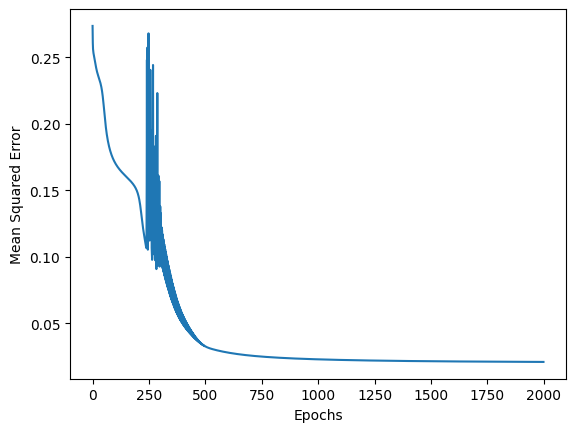

In [26]:
fn = FFNetwork()
fn.fit(X_train, Y_train, epochs = 2000, lr = .01, display_loss = True)

In [27]:
Y_pred_train = fn.predict(X_train)
Y_binerised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = fn.predict(X_test)
Y_binerised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_binerised_train, Y_train)
accuracy_test = accuracy_score(Y_binerised_test, Y_test)

In [28]:
print("Train accuracy", accuracy_train)
print("Test accuracy", accuracy_test)

Train accuracy 0.976
Test accuracy 0.94


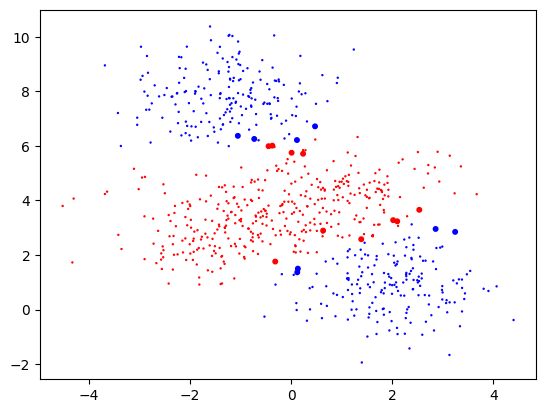

In [29]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_binerised_train, cmap = cmap, s = 10*np.abs(Y_binerised_train - Y_train)+.5)
plt.show()

# **Generic Class for FFN**

In [15]:
class genericFFN:
    def __init__(self, n_inputs, m_classes = 1, hiddensizes = [2]):
        self.nx = n_inputs
        self.nh = len(hiddensizes)
        self.ny = m_classes
        self.sizes = [self.nx] + hiddensizes + [self.ny]
        self.W = {}
        self.B = {}
        for i in range(self.nh + 1):
            self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
            self.B[i+1] = np.zeros((1,self.sizes[i+1]))
    def sigmoid(self, x):
        return 1.0 /(1.0 + np.exp(-x))
    def forward_pass(self, x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
        for i in range(self.nh+1):
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.sigmoid(self.A[i+1])
        return self.H[self.nh+1]
    def grad_sigmoid(self, x):
        return x*(1 - x)
    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    def predict(self, X):
        Y = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y.append(y_pred)
        return np.array(Y).squeeze()
    def fit(self, X, Y , epochs = 1, lr = 1, initialise = True, display_loss = False):
        if initialise:
            for i in range(self.nh +1):
                self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
                self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        if display_loss:
            loss = {}
        for e in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
            dW = {}
            dB = {}
            for i in range(self.nh + 1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for x,y in zip(X,Y):
                self.grad(x, y)
                for i in range(self.nh + 1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
            m = X.shape[1]
            for i in range(self.nh + 1):
                self.W[i+1] -= lr * dW[i+1] / m
                self.B[i+1] -= lr * dB[i+1] / m
            if display_loss:
                Y_pred = self.predict(X)
                loss[e] = mean_squared_error(Y_pred, Y)
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epochs")
            plt.ylabel("Mean Squared Error")
            plt.show()

# **Binary Classification**

C:\Users\Admin\AppData\Local\Temp\ipykernel_5040\658297257.py:50: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for e in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

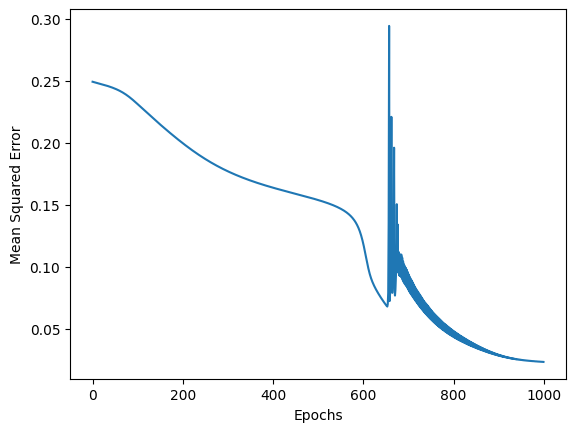

In [10]:
ffn = genericFFN(2, [2, 3])
ffn.fit(X_train, Y_train, epochs = 1000, lr = .001, display_loss = True)

In [11]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binerised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = ffn.predict(X_test)
Y_pred_binerised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binerised_train, Y_train)
accuracy_test = accuracy_score(Y_pred_binerised_test, Y_test)

In [12]:
print("Train accuracy", accuracy_train)
print("Test accuracy", accuracy_test)

Train accuracy 0.9706666666666667
Test accuracy 0.94


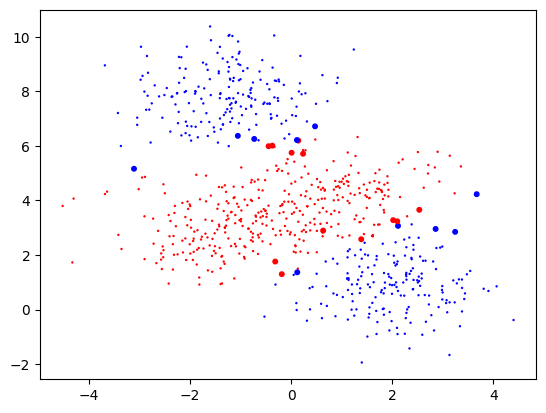

In [13]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binerised_train, cmap = cmap, s = 10*np.abs(Y_pred_binerised_train - Y_train)+.5)
plt.show()

# **MultiClass Classification**

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels_orig, stratify = labels_orig, random_state = 0)
print(X_train.shape, X_test.shape,Y_train.shape, Y_test.shape, labels_orig.shape)

(750, 2) (250, 2) (750,) (250,) (1000,)


In [19]:
encoder = OneHotEncoder()
y_train_OH = encoder.fit_transform(np.expand_dims(Y_train, 1)).toarray()
y_test_OH = encoder.fit_transform(np.expand_dims(Y_test, 1)).toarray()
print(y_train_OH.shape, y_test_OH.shape)

(750, 4) (250, 4)


C:\Users\Admin\AppData\Local\Temp\ipykernel_5040\4085148664.py:50: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for e in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):


  0%|          | 0/2000 [00:00<?, ?epoch/s]

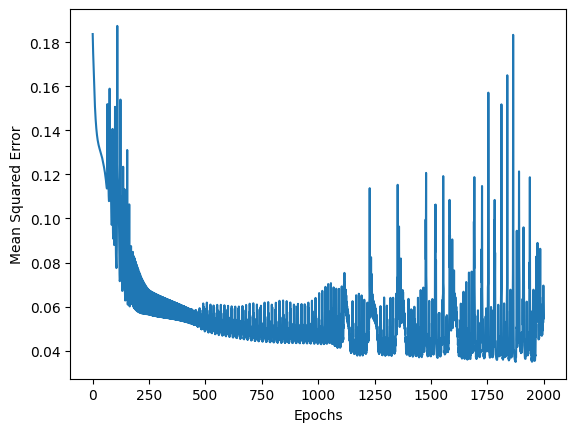

In [23]:
ffn = genericFFN(2,4,[2,3])
ffn.fit(X_train, y_train_OH, epochs = 2000, lr = 0.005, display_loss = True)

In [24]:
Y_pred_train = ffn.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1) # taking the max number in the 4 number as output of the network
Y_pred_test = ffn.predict(X_test)
Y_pred_test = np.argmax(Y_pred_test,1)
accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_test = accuracy_score(Y_pred_test, Y_test)

In [25]:
print("Train accuracy", accuracy_train)
print("Test accuracy", accuracy_test)

Train accuracy 0.8773333333333333
Test accuracy 0.872


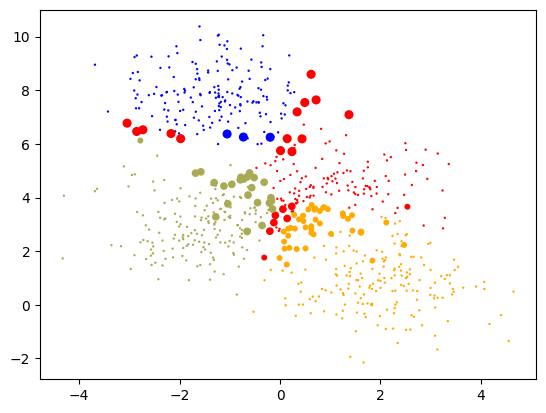

In [26]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap = cmap, s = 10*np.abs(Y_pred_train - Y_train)+.5)
plt.show()